# Visualization of inversion - complex data

In [45]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import scipy.stats as sp

from fatiando.vis import mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [47]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [48]:
mypath = 'data/real_obs_pts/tfa_inversion/inc-50_dec9_r800_int11_z0-320_dz650/'

In [49]:
with open(mypath+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [50]:
with open('data/model_real_obs_pts.pickle') as w:
        model = pickle.load(w)

In [51]:
inversion['estimate'][-1]

691.6613502547302

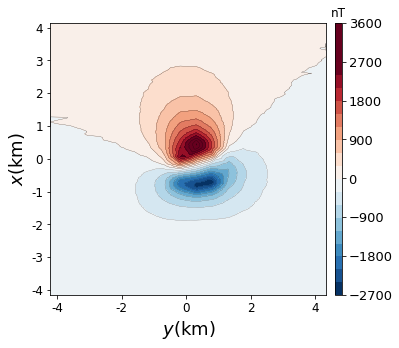

In [52]:
plt.figure(figsize=(6,5))
#plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontour(inversion['y'], inversion['x'], inversion['observed_data'], 20, linewidths=0.2, colors='k')
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
#plt.plot(inversion['y'], inversion['x'], 'ko', markersize=1.)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'complex_tfa_data.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'complex_real_data.png', width=1000, height=1200)

In [53]:
inversion['regularization']

array([3.68686167e-07, 4.09651297e-07, 0.00000000e+00, 0.00000000e+00,
       4.09651297e-05, 7.37372334e-09, 1.47474467e-04])

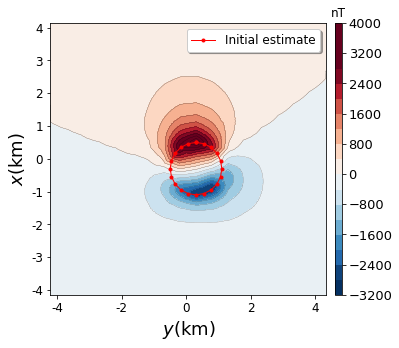

In [54]:
plt.figure(figsize=(6,5))
#plt.title('Predicted TFA', fontsize=20)
plt.tricontour(inversion['y'], inversion['x'], inversion['initial_data'], 20, linewidths=0.2, colors='k')
norm=mpb.colors.Normalize(vmin=np.min(inversion['initial_data']), vmax=np.min(inversion['initial_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'complex_tfa_pred_data_true_inital.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_tfa_pred_data_true_inital.png', width=1000, height=1200)

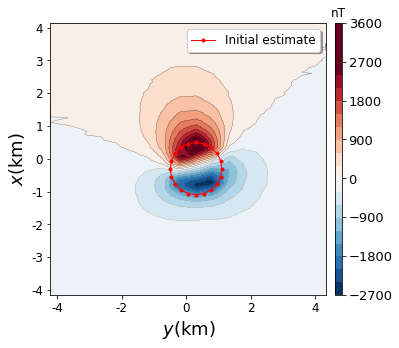

In [55]:
plt.figure(figsize=(6,5))

#plt.title('Observed TFA', fontsize=20)
plt.tricontour(inversion['y'], inversion['x'], inversion['observed_data'], 20, linewidths=0.2, colors='k')
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(inversion['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'complex_tfa_obs_data_true_inital.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_tfa_obs_data_true_inital.png', width=1000, height=1200)

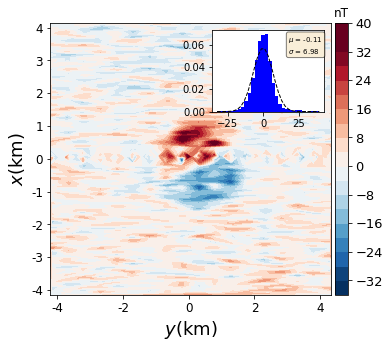

In [56]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
#plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')


plt.savefig(mypath+'complex_tfa_residual.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'diorama_tfa_residual.png', width=1600, height=400)

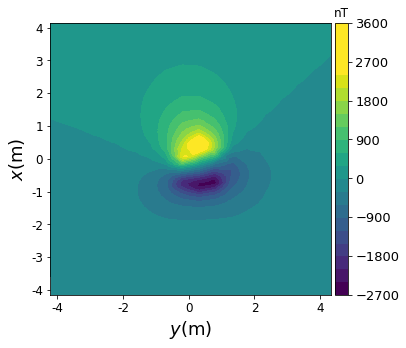

In [57]:
plt.figure(figsize=(6,5))
#plt.title('Predicted', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['data_fit']), vmax=np.min(inversion['data_fit'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'], 20, cmap='viridis', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
#plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
#plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'complex_tfa_predict.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'complex_tfa_predict.png', width=1600, height=400)

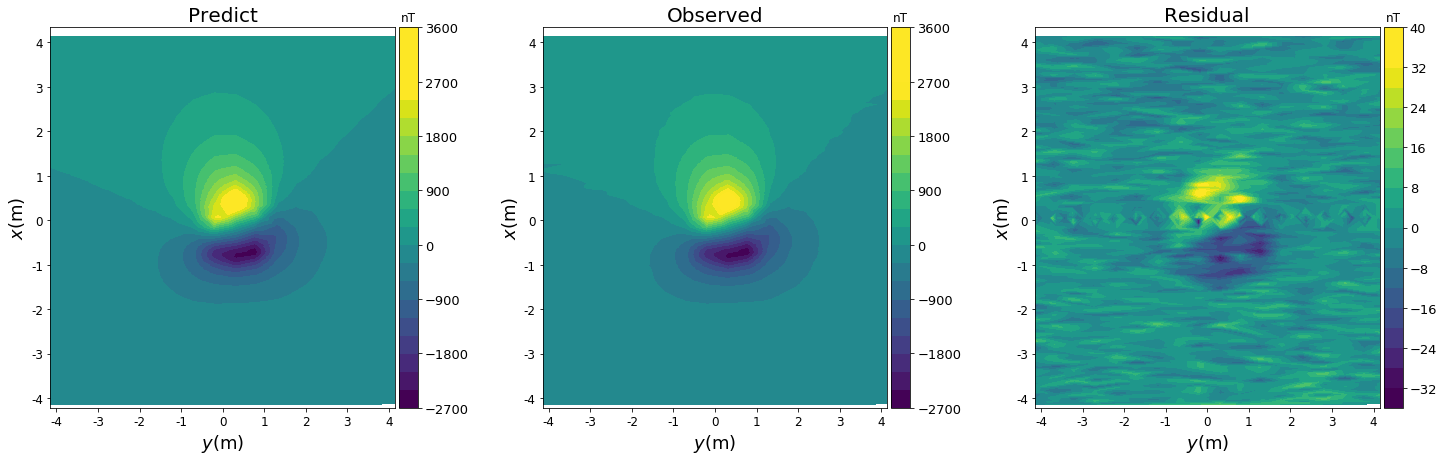

In [58]:
# plot
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['data_fit']), vmax=np.min(inversion['data_fit'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['data_fit'],20, cmap='viridis', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['observed_data']), vmax=np.min(inversion['observed_data'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20, cmap='viridis', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20, cmap='viridis', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'complex_tfa_fit.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'complex_tfa_fit.png', width=1600, height=400)

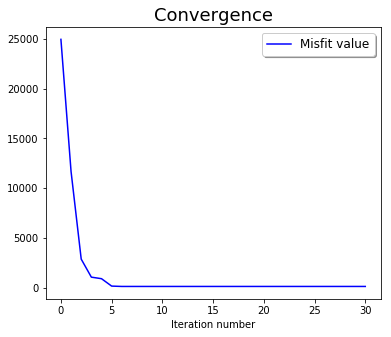

In [59]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(inversion['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'complex_tfa_convergence.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_tfa_convergence.png', width=400, height=400)

In [60]:
x = inversion['x']/1000.
y = inversion['y']/1000.
z = inversion['z']/1000.

for i in range(len(inversion['prisms'])):
    inversion['prisms'][i].x /= 1000.
    inversion['prisms'][i].y /= 1000.
    inversion['prisms'][i].z1 /= 1000.
    inversion['prisms'][i].z2 /= 1000.
    inversion['initial_estimate'][i].x /= 1000.
    inversion['initial_estimate'][i].y /= 1000.
    inversion['initial_estimate'][i].z1 /= 1000.
    inversion['initial_estimate'][i].z2 /= 1000.
#     model['prisms'][i].x /= 1000.
#     model['prisms'][i].y /= 1000.
#     model['prisms'][i].z1 /= 1000.
#     model['prisms'][i].z2 /= 1000.
    
for i in model['prisms']:
    i.x /= 1000.
    i.y /= 1000.
    i.z1 /= 1000.
    i.z2 /= 1000.

In [61]:
verts = mfun.plot_prisms(inversion['prisms'])
verts_true = mfun.plot_prisms(model['prisms'])
verts_initial = mfun.plot_prisms(inversion['initial_estimate'])

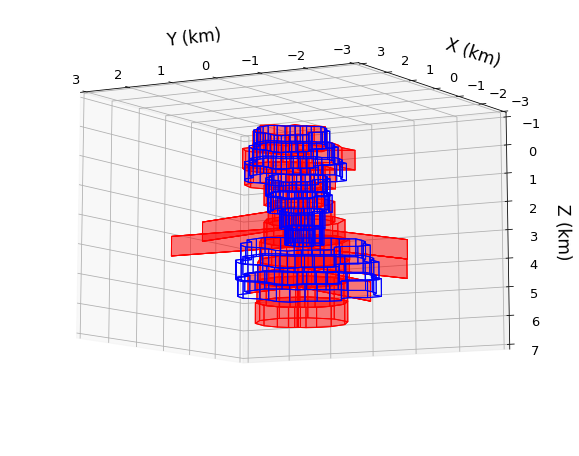

In [62]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'complex_3d_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

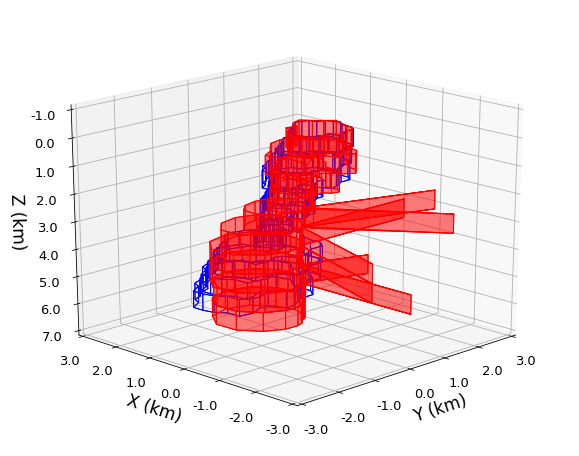

In [63]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'complex_3d_estimate2.png', dpi=300, bbox_inches="tight")
plt.show()

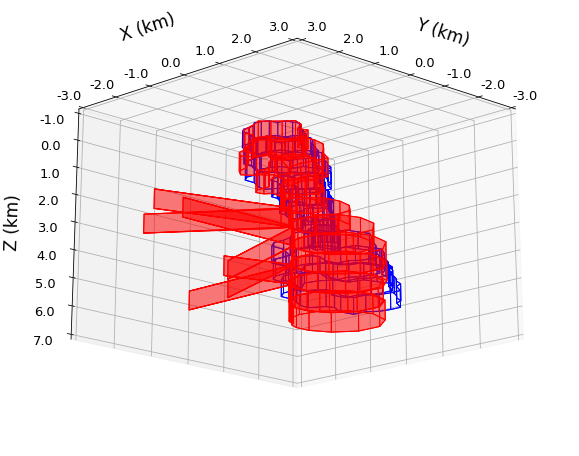

In [64]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=15
ax.xaxis.labelpad=15

ax.view_init(-20, 45)
ax.autoscale_view()

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-1150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'complex_3d_estimate3.png', dpi=300, bbox_inches="tight")
plt.show()

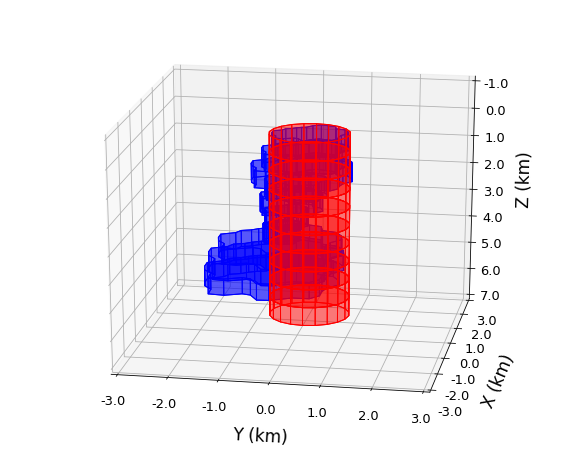

In [65]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.4, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=1., edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20

ax.view_init(20, -80)

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'complex_3d_ini_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'kimberlite_3d_estimate.png', width=400, height=400)

In [66]:
# calculate the momentum

volume = 0.
momentum = 0.
for bolacha in model['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*model['intensity']
    
momentum

645.2365338813152

In [22]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
momentum

663.6102030021929

In [23]:
# calculate the momentum

volume_true = 0.
momentum_true = 0.
for bolacha in model['prisms']:
    area_true = mfun.area_polygon(bolacha.x, bolacha.y)
    volume_true += area_true*(bolacha.z2 - bolacha.z1)
    momentum_true += volume_true*model['intensity']
    
print volume_true/10.**9.    
print momentum_true/10.**9.

1.2605866818679228e-08
6.452365338813152e-07


In [24]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
print volume/10.**9.
print momentum/10.**9.

1.2819023962184707e-08
6.636102030021929e-07


In [25]:
(volume_true - volume)*100./volume_true

-1.6909360266255125

In [26]:
((momentum_true - momentum)*100./momentum_true)

-2.847586606783391

In [60]:
inversion['estimate'][-1]*len(inversion['initial_estimate'])

6145.120390555435

In [61]:
model['dz']*model['L']

6000.0

In [62]:
np.std(inversion['residual'])/np.std(inversion['observed_data'])*100

1.1762530694730577

In [80]:
plt.figure(figsize=(10,10))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20,
                cmap='RdBu_r', vmin=np.min(inversion['residual']),
                vmax=np.min(inversion['residual'])*(-1)).ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.7, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(-6000, 5500, '(a)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(20, 135)
ax.text2D(-0.1, 0.1, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
plt.figure(figsize=(10,10))

# sinthetic data
ax=plt.subplot(2,2,1)
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20,
                cmap='RdBu_r', vmin=np.min(inversion['observed_data']),
                vmax=-np.min(inversion['observed_data'])).ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(inversion['y'], inversion['x'], 'ko', markersize=.25, label='Gaussian')
plt.text(-5500, 3800, '(a)', fontsize= 15)

# plot topography
ax=plt.subplot(2,2,2)
#plt.title('Residual', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['z'] + 150., 20,
                cmap='inferno').ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(inversion['y'], inversion['x'], 'ko', markersize=.25, label='Gaussian')
plt.text(-5500, 3800, '(b)', fontsize= 15)

# true model
ax = plt.subplot(2,2,3, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(0, 40)
ax.text2D(-0.1, 0.07, '(c)', fontsize= 15)

# true model
ax = plt.subplot(2,2,4, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(20, 135)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()

plt.savefig(mypath+'model_data.png', dpi=300, bbox_inches='tight')

plt.show()